In [1]:
!git clone https://github.com/Karan-Malik/FaceMaskDetector


Cloning into 'FaceMaskDetector'...
remote: Enumerating objects: 1543, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 1543 (delta 44), reused 72 (delta 31), pack-reused 1454
Receiving objects: 100% (1543/1543), 84.40 MiB | 26.22 MiB/s, done.
Resolving deltas: 100% (61/61), done.


# New section

In [2]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
#from keras.optimizers import adam
from keras.preprocessing import image
import cv2
import datetime

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
training_set = train_datagen.flow_from_directory(
        '/content/FaceMaskDetector/train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

Found 1314 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory(
        '/content/FaceMaskDetector/test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

Found 194 images belonging to 2 classes.


In [10]:
model_saved=model.fit_generator(
        training_set,
        epochs=10,
        validation_data=test_set,

        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
83/83 [==============================] - 46s 543ms/step - loss: 0.3679 - accuracy: 0.8158 - val_loss: 0.1235 - val_accuracy: 0.9485
Epoch 2/10
83/83 [==============================] - 46s 554ms/step - loss: 0.1285 - accuracy: 0.9528 - val_loss: 0.1041 - val_accuracy: 0.9639
Epoch 3/10
83/83 [==============================] - 47s 563ms/step - loss: 0.1021 - accuracy: 0.9665 - val_loss: 0.0830 - val_accuracy: 0.9691
Epoch 4/10
83/83 [==============================] - 45s 540ms/step - loss: 0.1104 - accuracy: 0.9619 - val_loss: 0.0999 - val_accuracy: 0.9691
Epoch 5/10
83/83 [==============================] - 45s 537ms/step - loss: 0.1044 - accuracy: 0.9612 - val_loss: 0.0736 - val_accuracy: 0.9845
Epoch 6/10
83/83 [==============================] - 46s 550ms/step - loss: 0.1222 - accuracy: 0.9536 - val_loss: 0.0860 - val_accuracy: 0.9691
Epoch 7/10
83/83 [==============================] - 44s 534ms/step - loss: 0.0662 - accuracy: 0.9795 - val_loss: 0.0833 - val_accuracy: 0.9691

In [11]:
model.save('mymodel.h5',model_saved)


In [12]:
mymodel=load_model('mymodel.h5')


In [13]:
import cv2
import matplotlib.pyplot as plt

In [15]:
!git clone "https://github.com/Viswapriyacse/Ex.No.5.git"

Cloning into 'Ex.No.5'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [16]:
test_image=image.load_img('/content/Ex.No.5/with mask.jpg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("With Mask")
else:
  print("Without Mask")

With Mask


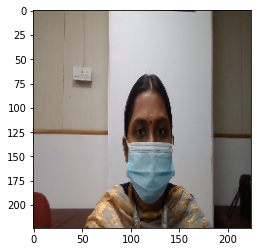

In [17]:
im = cv2.imread('/content/Ex.No.5/with mask.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()


In [19]:
test_image=image.load_img('/content/Ex.No.5/without mask.jpg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("With Mask")
else:
  print("Without Mask")

With Mask


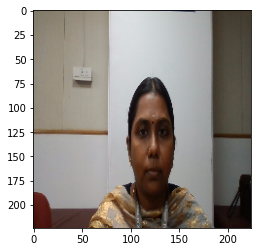

In [20]:
im = cv2.imread('/content/Ex.No.5/without mask.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0